Epoch [1/20], Pérdida: 3.8511
Epoch [2/20], Pérdida: 3.3794
Epoch [3/20], Pérdida: 2.9697
Epoch [4/20], Pérdida: 2.6139
Epoch [5/20], Pérdida: 2.3048
Epoch [6/20], Pérdida: 2.0364
Epoch [7/20], Pérdida: 1.8033
Epoch [8/20], Pérdida: 1.6008
Epoch [9/20], Pérdida: 1.4249
Epoch [10/20], Pérdida: 1.2722
Epoch [11/20], Pérdida: 1.1395
Epoch [12/20], Pérdida: 1.0242
Epoch [13/20], Pérdida: 0.9241
Epoch [14/20], Pérdida: 0.8372
Epoch [15/20], Pérdida: 0.7616
Epoch [16/20], Pérdida: 0.6960
Epoch [17/20], Pérdida: 0.6390
Epoch [18/20], Pérdida: 0.5895
Epoch [19/20], Pérdida: 0.5466
Epoch [20/20], Pérdida: 0.5092


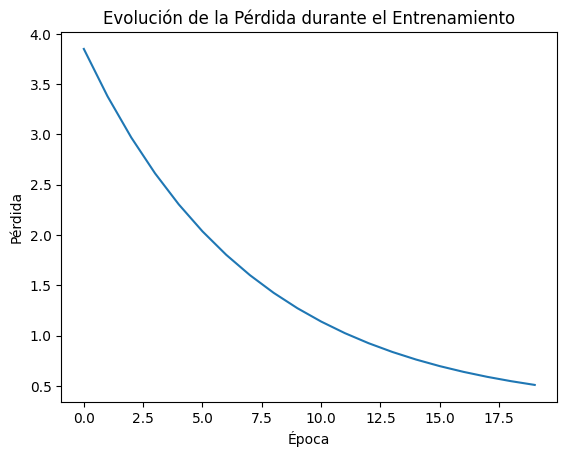

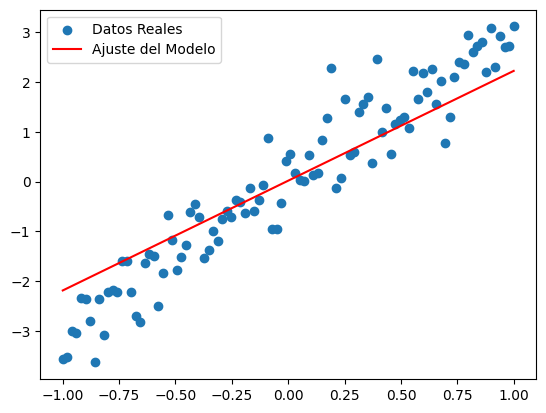

In [1]:
import torch
import matplotlib.pyplot as plt

# Generar datos sintéticos
torch.manual_seed(0)
X = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = X * 3 + torch.randn(X.size()) * 0.5  # y = 3x + ruido

# Definir el modelo lineal
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # Una entrada, una salida

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()

# Definir la función de pérdida y el optimizador
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Listas para almacenar el historial de pérdidas
losses = []

# Entrenamiento
num_epochs = 20
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backward pass y optimización
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Guardar la pérdida
    losses.append(loss.item())

    # Imprimir información
    print(f'Epoch [{epoch+1}/{num_epochs}], Pérdida: {loss.item():.4f}')

# Visualización de la pérdida
plt.plot(range(num_epochs), losses)
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.show()

# Visualización de los datos y la recta ajustada
predicted = model(X).detach()
plt.scatter(X.numpy(), y.numpy(), label='Datos Reales')
plt.plot(X.numpy(), predicted.numpy(), 'r-', label='Ajuste del Modelo')
plt.legend()
plt.show()


In [2]:
import torch

# Datos simples
X = torch.tensor([[1.0], [2.0], [3.0]])
y = torch.tensor([[2.0], [4.0], [6.0]])

# Inicializar pesos y sesgos
w = torch.tensor([[0.0]], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)
lr = 0.01  # Tasa de aprendizaje

# Entrenamiento
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    y_pred = X @ w + b
    loss = torch.mean((y_pred - y) ** 2)

    # Backward pass
    loss.backward()

    # Actualización de parámetros
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # Resetear gradientes
    w.grad.zero_()
    b.grad.zero_()

    # Imprimir información cada 100 épocas
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Pérdida: {loss.item():.4f}')

print(f'Peso aprendido: {w.item()}, Sesgo aprendido: {b.item()}')


Epoch [100/1000], Pérdida: 0.0484
Epoch [200/1000], Pérdida: 0.0299
Epoch [300/1000], Pérdida: 0.0185
Epoch [400/1000], Pérdida: 0.0114
Epoch [500/1000], Pérdida: 0.0071
Epoch [600/1000], Pérdida: 0.0044
Epoch [700/1000], Pérdida: 0.0027
Epoch [800/1000], Pérdida: 0.0017
Epoch [900/1000], Pérdida: 0.0010
Epoch [1000/1000], Pérdida: 0.0006
Peso aprendido: 1.9707825183868408, Sesgo aprendido: 0.06641823798418045


In [3]:
# Suponiendo que X y y son datos previamente definidos
dataset = torch.utils.data.TensorDataset(X, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

num_epochs = 20
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


In [4]:
# Definir una red profunda
class DeepNetwork(torch.nn.Module):
    def __init__(self):
        super(DeepNetwork, self).__init__()
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(1, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.layers(x)

model = DeepNetwork()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Entrenamiento con clipping de gradientes
for epoch in range(num_epochs):
    outputs = model(X)
    loss = criterion(outputs, y)

    optimizer.zero_grad()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
